Benchmarking AstroML 5.8  code : gridsize and number of bootstraps 

## 1) number of bootstraps and gridsize


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time 


In [3]:
# A single lightcurve of legth 100 points,  with some simple random errors...
xi  = np.random.random(100)
ei  = 0.01 * np.random.random(100)

In [11]:
# import the package 
import sys
sys.path.insert(0, '../packages/')
import variabilityFunctions as varF

import imp
imp.reload(varF)


<module 'variabilityFunctions' from '../packages/variabilityFunctions.py'>

In [88]:
N_boot_arr = [100,500,1000,2000,5000,10000]
gridsize_arr  =[30,40,50,60,70,80,90,100]

mu_arr  = np.zeros((len(N_boot_arr), len(gridsize_arr)))
sig_arr  = np.zeros((len(N_boot_arr), len(gridsize_arr)))
t_arr = np.zeros((len(N_boot_arr), len(gridsize_arr)))

for i in range(len(N_boot_arr)):
    N_boot = N_boot_arr[i]
    print 'N_boot=', N_boot
    
    for j in range(len(gridsize_arr)):
        gridsize = gridsize_arr[j]
        print 'N_grid=', gridsize
        result = %timeit -o varF.get_mu_sigma(xi,ei, N_boot=N_boot, gridsize=gridsize)
        t_msec = result.best*1000
        print t_msec, ' miliseconds'
        mu,sig = get_mu_sigma(xi,ei, N_boot=N_boot)
        print mu, sig
        mu_arr[i,j] = mu
        sig_arr[i,j] = sig
        t_arr[i,j] = t_msec
        print '\n'

N_boot= 100
N_grid= 30
1000 loops, best of 3: 1.27 ms per loop
1.26778507233  miliseconds
[ 0.01376146] [ 0.00384985]


N_grid= 40
1000 loops, best of 3: 1.5 ms per loop
1.50124001503  miliseconds
[ 0.01378353] [ 0.00376321]


N_grid= 50
1000 loops, best of 3: 1.83 ms per loop
1.82641386986  miliseconds
[ 0.01380751] [ 0.00385551]


N_grid= 60
100 loops, best of 3: 2.2 ms per loop
2.19855070114  miliseconds
[ 0.01377185] [ 0.00380041]


N_grid= 70
100 loops, best of 3: 2.75 ms per loop
2.75274038315  miliseconds
[ 0.01380751] [ 0.00381285]


N_grid= 80
100 loops, best of 3: 3.32 ms per loop
3.32258939743  miliseconds
[ 0.01380751] [ 0.00379407]


N_grid= 90
100 loops, best of 3: 4 ms per loop
3.99785041809  miliseconds
[ 0.01381124] [ 0.0038121]


N_grid= 100
100 loops, best of 3: 4.73 ms per loop
4.72619056702  miliseconds
[ 0.01378565] [ 0.00382988]


N_boot= 500
N_grid= 30
100 loops, best of 3: 3.46 ms per loop
3.46233129501  miliseconds
[ 0.01379511] [ 0.00379319]


N_grid= 40
100 

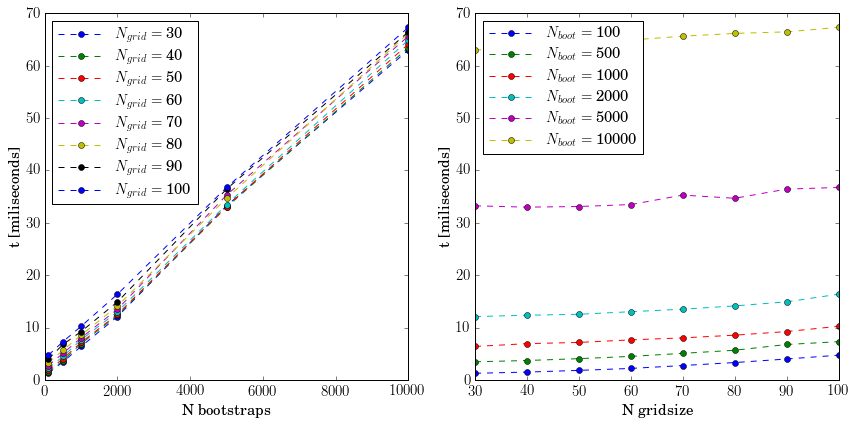

In [122]:
%matplotlib inline 
fig,ax = plt.subplots(1,2, figsize=(12,6))
for g in range(len(gridsize_arr)):
    ax[0].plot(N_boot_arr, t_arr[:,g],marker='o', linestyle='--', label=r'$N_{grid}=$'+' '+ str(gridsize_arr[g]))
    

ax[0].set_xlabel('N bootstraps', fontsize=15)
ax[0].set_ylabel('t [miliseconds]', fontsize=15)
ax[0].legend(loc='upper left', fontsize=15,numpoints=1)    
ax[0].tick_params(axis='both', which='major', labelsize=15)

for b in range(len(N_boot_arr)):
    ax[1].plot(gridsize_arr, t_arr[b,:], marker='o', linestyle='--', label=r'$N_{boot}=$'+' '+str(N_boot_arr[b]))

ax[1].set_xlabel('N gridsize', fontsize=15)
ax[1].set_ylabel('t [miliseconds]',fontsize=15) 
ax[1].legend(loc='upper left',fontsize=15,numpoints=1)

ax[1].tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('AstroML_sigma_mu_benchmarking.png')

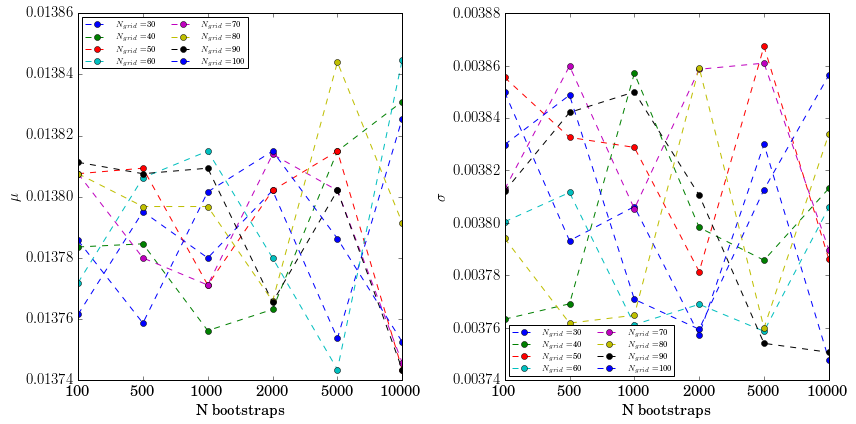

In [131]:
%matplotlib inline 
fig,ax = plt.subplots(1,2,figsize=(12,6))
my_xticks = [str(N) for N in N_boot_arr]
my_label = [r'$N_{grid}= $'+str(g) for g in gridsize_arr]
#my_label = ['N_grid='+a for a in my_label]
ax[0].set_xticklabels( my_xticks)
ax[0].plot(mu_arr,marker='o', linestyle='--')
ax[0].legend(x, my_label, loc=0, ncol=2,numpoints=1)
ax[0].set_ylabel(r'$\mu$', fontsize=15)
ax[0].set_xlabel('N bootstraps', fontsize=15)

ax[0].tick_params(axis='both', which='major', labelsize=15)

ax[1].set_xticklabels( my_xticks)
ax[1].plot(sig_arr,marker='o', linestyle='--')
ax[1].legend(x, my_label, loc=0, ncol=2,numpoints=1)
ax[1].set_ylabel(r'$\sigma$', fontsize=15)
ax[1].set_xlabel('N bootstraps', fontsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

## 2) Number of points 

In [ ]:
# In making Fig.2 for the CRTS paper, we are calculating 
# SF based on sigma from the AstroML code for xi,ei binned
# along log(tau), so that there are hundreds to tens of thousands 
# delta_mi,  delta_ti  points per bin 

# N_points  = 10  : 150  is appropriate for calculating mu, sigma 
# if we use as xi, ei  the 
N_points = np.arange(10,2*1e4,100).astype(int)

# storage array 
time_arr = np.zeros(len(N_points))

for i in range(len(N_points)):
    N = N_points[i]
    xi = np.sin(100 * np.random.random(N))
    ei = np.ones_like(xi)*0.1 # homoscedastic error  -  constant in fact 
    result = %timeit -o varF.get_mu_sigma(xi,ei)
    t_msec = result.best*1000
    print('N_points=%d,  takes %f miliseconds'%(N,t_msec))
    time_arr[i] = t_msec
    print('\n')

In [ ]:
%matplotlib inline

msk = time_arr[:355] < 10 * 1000
x = N_pts[:355][msk]
y = 0.001 * time_arr[:355][msk]

from scipy.optimize import curve_fit

def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, x, y)
a,b = popt[0], popt[1]

plt.scatter(x,y)
plt.plot(x, func(x,a,b), lw=3, ls='--', c='orange')
plt.xlabel('N points')
plt.ylabel('t [seconds]')
print('t_execution = %f  * t  %f' %(a,b))